In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import torch

In [35]:
target = 'Item_Outlet_Sales'
training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')
x_train, x_test, y_train, y_test = training.drop(columns=[target]), testing.drop(columns=[target]), training[target], testing[target]
x_train.columns

Index(['Low_Fat', 'Regular', 'Dairy', 'Soft_Drinks', 'Meat',
       'Fruits_Vegetables', 'Household', 'Baking', 'Snack', 'Fronzen_Foods',
       'Breakfast', 'Health_Hygiene', 'Hard_Drinks', 'Canned', 'Breads',
       'Starchy', 'Others', 'Seafood', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 'Item_Visibility',
       'Outlet_Year', 'Item_Identifier_8', 'Item_Identifier_6',
       'Item_Identifier_7', 'Item_Identifier_3', 'Item_Identifier_5',
       'Item_Identifier_4', 'Item_Identifier_9', 'Item_Identifier_2',
       'Item_Identifier_1', 'Outlet_Freq'],
      dtype='object')

In [37]:
y_train

0       2386.2272
1       3103.9596
2       1125.2020
3        284.2966
4       4224.5010
          ...    
6813     280.9676
6814    1301.6390
6815    6145.3340
6816    1649.8524
6817     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [38]:
x_train = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train)
res = lr.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:29:18   Log-Likelihood:                -57838.
No. Observations:                6818   AIC:                         1.157e+05
Df Residuals:                    6784   BIC:                         1.160e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.339e+14 

In [43]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=1).fit_transform(x_train)
x_embedded

array([[ 39.131184],
       [-61.487354],
       [ 37.420547],
       ...,
       [-49.32669 ],
       [-14.802942],
       [-76.39123 ]], dtype=float32)

In [47]:
test = x_embedded.flatten()
test

array([ 39.131184, -61.487354,  37.420547, ..., -49.32669 , -14.802942,
       -76.39123 ], dtype=float32)

<AxesSubplot: ylabel='Item_Outlet_Sales'>

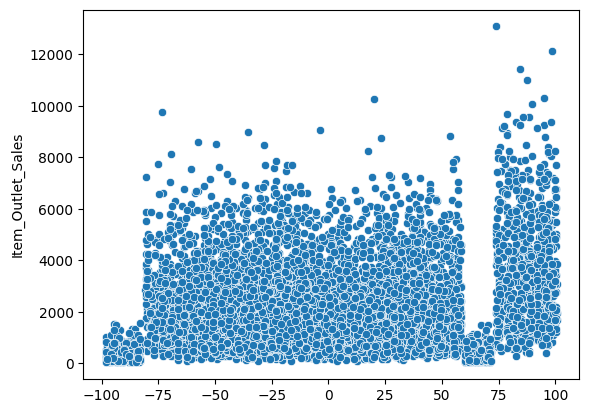

In [49]:
sns.scatterplot(x=test, y=y_train)
